In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

In [21]:
pd.set_option('display.max_columns',None)
pd.set_option('display.precision',2)
df = pd.read_csv('dataset/train.csv',index_col=0)
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.60,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.57,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.18,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.94,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.38,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [22]:
df.Gender = df.Gender.astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Policy Type'] = df['Policy Type'].astype('category')
df['Customer Feedback'] = df['Customer Feedback'].astype('category')
df['Smoking Status'] = df['Smoking Status'].astype('category')
df['Exercise Frequency'] = df['Exercise Frequency'].astype('category')
df['Property Type'] = df['Property Type'].astype('category')

In [23]:
cat_cols = ['Gender','Marital Status', 'Education Level', 'Occupation',
       'Location', 'Policy Type',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type','Previous Claims']

In [24]:
df['Previous Claims'] = df['Previous Claims'].clip(0,2).replace({np.nan:'unknown',0:'none',1:'one',2:'two_or_more'})
display(df['Previous Claims'].value_counts(dropna=False))
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)

Previous Claims
unknown        364029
none           305433
one            300811
two_or_more    229727
Name: count, dtype: int64

In [25]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.18e+06,1.16e+06,1.09e+06,1.13e+06,1.20e+06,1.06e+06,1.20e+06,1.20e+06
mean,4.11e+01,3.27e+04,2.01e+00,2.56e+01,9.57e+00,5.93e+02,5.02e+00,1.10e+03
std,1.35e+01,3.22e+04,1.42e+00,1.22e+01,5.78e+00,1.50e+02,2.59e+00,8.65e+02
min,1.80e+01,1.00e+00,0.00e+00,2.01e+00,0.00e+00,3.00e+02,1.00e+00,2.00e+01
25%,3.00e+01,8.00e+03,1.00e+00,1.59e+01,5.00e+00,4.68e+02,3.00e+00,5.14e+02
50%,4.10e+01,2.39e+04,2.00e+00,2.46e+01,1.00e+01,5.95e+02,5.00e+00,8.72e+02
75%,5.30e+01,4.46e+04,3.00e+00,3.45e+01,1.50e+01,7.21e+02,7.00e+00,1.51e+03
max,6.40e+01,1.50e+05,4.00e+00,5.90e+01,1.90e+01,8.49e+02,9.00e+00,5.00e+03


In [26]:
df.isna().mean().sort_values().tail(10)

Premium Amount                 0.00e+00
Policy Start Date              0.00e+00
Previous Claims_two_or_more    0.00e+00
Insurance Duration             8.33e-07
Vehicle Age                    5.00e-06
Age                            1.56e-02
Annual Income                  3.75e-02
Health Score                   6.17e-02
Number of Dependents           9.14e-02
Credit Score                   1.15e-01
dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Age                          1181295 non-null  float64
 1   Annual Income                1155051 non-null  float64
 2   Number of Dependents         1090328 non-null  float64
 3   Health Score                 1125924 non-null  float64
 4   Vehicle Age                  1199994 non-null  float64
 5   Credit Score                 1062118 non-null  float64
 6   Insurance Duration           1199999 non-null  float64
 7   Policy Start Date            1200000 non-null  object 
 8   Premium Amount               1200000 non-null  float64
 9   Gender_Male                  1200000 non-null  bool   
 10  Marital Status_Married       1200000 non-null  bool   
 11  Marital Status_Single        1200000 non-null  bool   
 12  Education Level_High School  1200000 non-null  

In [45]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date']).apply(lambda x: x.timestamp())

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Age                          1181295 non-null  float64
 1   Annual Income                1155051 non-null  float64
 2   Number of Dependents         1090328 non-null  float64
 3   Health Score                 1125924 non-null  float64
 4   Vehicle Age                  1199994 non-null  float64
 5   Credit Score                 1062118 non-null  float64
 6   Insurance Duration           1199999 non-null  float64
 7   Policy Start Date            1200000 non-null  float64
 8   Premium Amount               1200000 non-null  float64
 9   Gender_Male                  1200000 non-null  bool   
 10  Marital Status_Married       1200000 non-null  bool   
 11  Marital Status_Single        1200000 non-null  bool   
 12  Education Level_High School  1200000 non-null  

In [48]:
df.fillna(df.median(),inplace=True)

<Axes: >

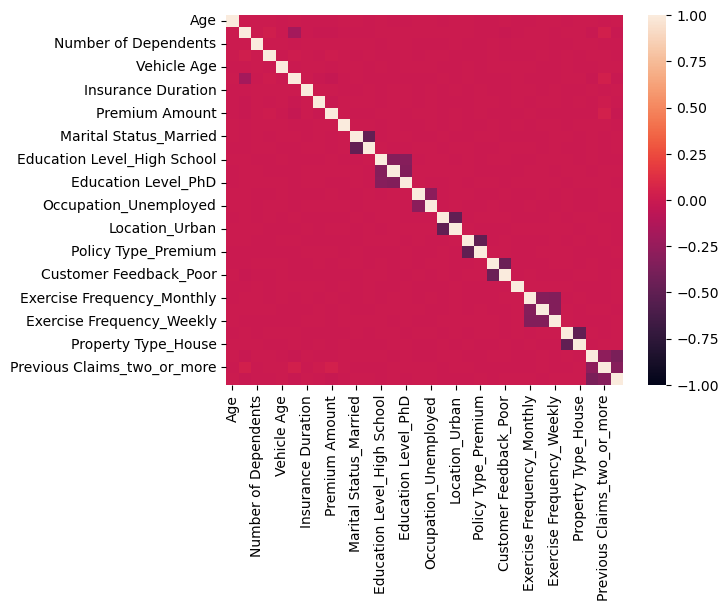

In [49]:
sns.heatmap(df.sample(frac=0.5).corr(),vmin=-1,vmax=1)

In [73]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import scipy.stats as stats

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(
    df[[c for c in df.columns if c != 'Premium Amount']],df['Premium Amount'],
    random_state=42,test_size=0.3,stratify=pd.qcut(df['Premium Amount'],100).cat.codes)
xtrainsub,_,ytrainsub,_ = train_test_split(
    xtrain,ytrain,random_state=42,train_size=10000,stratify=pd.qcut(ytrain,100).cat.codes)

In [80]:
ss = StandardScaler()
pipe = Pipeline([('scaler', StandardScaler()),('model',Lasso())])
param_grid = {'model__alpha':np.logspace(-4,4,30)}
gs = GridSearchCV(pipe, scoring = 'neg_root_mean_squared_log_error',param_grid=param_grid, cv=5,n_jobs=-1)
param_grid

{'model__alpha': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
        1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
        1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
        2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
        2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
        3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
        4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
        5.29831691e+03, 1.00000000e+04])}

In [81]:
gs.fit(xtrainsub,ytrainsub)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04])},
             scoring='neg_root_mean_squared_log_error')

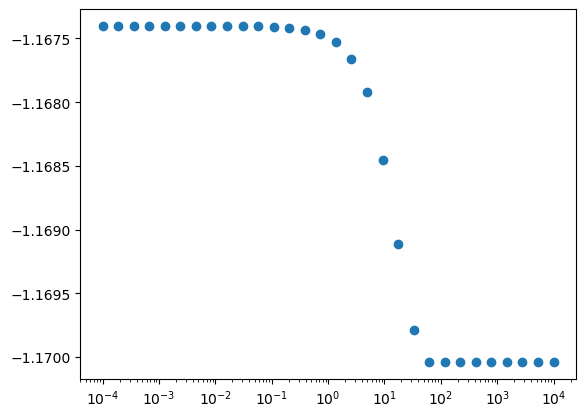

In [82]:
plt.scatter(gs.cv_results_['param_model__alpha'].data, gs.cv_results_['mean_test_score'])
plt.xscale('log')

In [83]:
gs.best_score_

-1.1674013020264726

In [84]:
pd.Series(gs.best_estimator_[-1].coef_, index=[c for c in df.columns if c != 'Premium Amount']).sort_values()

Credit Score                  -31.54
Marital Status_Single         -22.76
Policy Type_Comprehensive     -16.85
Annual Income                 -13.49
Education Level_High School    -9.43
Policy Start Date              -8.46
Occupation_Self-Employed       -8.28
Property Type_Condo            -6.23
Gender_Male                    -5.46
Marital Status_Married         -4.57
Education Level_Master's       -3.83
Previous Claims_one            -3.78
Insurance Duration             -2.81
Number of Dependents           -2.23
Age                            -2.19
Vehicle Age                    -1.57
Education Level_PhD            -0.79
Location_Urban                 -0.64
Smoking Status_Yes              1.27
Policy Type_Premium             2.74
Occupation_Unemployed           3.22
Previous Claims_unknown         3.59
Location_Suburban               4.74
Customer Feedback_Poor          4.94
Health Score                    6.53
Customer Feedback_Good          9.37
Property Type_House            11.93
E

In [85]:
root_mean_squared_log_error(ytest, gs.best_estimator_.predict(xtest))

1.1684369059749018

In [ ]:
ss = StandardScaler()
pipe = Pipeline([('scaler',StandardScaler()),('model',RandomForestRegressor(n_estimators=50, max_features="sqrt", min_weight_fraction_leaf=0.001,n_jobs=-1))])
param_grid = {'model__min_weight_fraction_leaf':np.logspace(-4,-1,20),
              'model__max_features':[None],
              'model__n_estimators':[100],
              'model__max_depth':[5,10,20,50,100]}
gs = GridSearchCV(pipe, scoring = 'neg_root_mean_squared_log_error',param_grid=param_grid, cv=3,n_jobs=-1)
param_grid

{'model__min_weight_fraction_leaf': array([0.0001    , 0.00014384, 0.00020691, 0.00029764, 0.00042813,
        0.00061585, 0.00088587, 0.00127427, 0.00183298, 0.00263665,
        0.00379269, 0.00545559, 0.0078476 , 0.01128838, 0.01623777,
        0.02335721, 0.03359818, 0.0483293 , 0.06951928, 0.1       ]),
 'model__max_features': [None],
 'model__n_estimators': [100],
 'model__max_depth': [5, 10, 20, 50, 100]}

In [101]:
gs.fit(xtrainsub,ytrainsub)
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 1, 'model__max_features': 'sqrt', 'model__min_weight_fraction_leaf': 0.06951927961775606, 'model__n_estimators': 2000}
-1.1698614431352112


In [92]:
best = gs.best_estimator_
best.fit(xtrain,ytrain)
print('test score:',root_mean_squared_log_error(ytest, best.predict(xtest)))

test score: 1.1399195660796582


In [93]:
pd.Series(best[-1].feature_importances_, index=[c for c in df.columns if c != 'Premium Amount']).sort_values().tail(10)

Insurance Duration             1.08e-03
Vehicle Age                    2.03e-03
Age                            2.29e-03
Customer Feedback_Good         1.65e-02
Customer Feedback_Poor         2.52e-02
Previous Claims_two_or_more    9.36e-02
Policy Start Date              1.12e-01
Credit Score                   1.30e-01
Health Score                   2.76e-01
Annual Income                  3.35e-01
dtype: float64

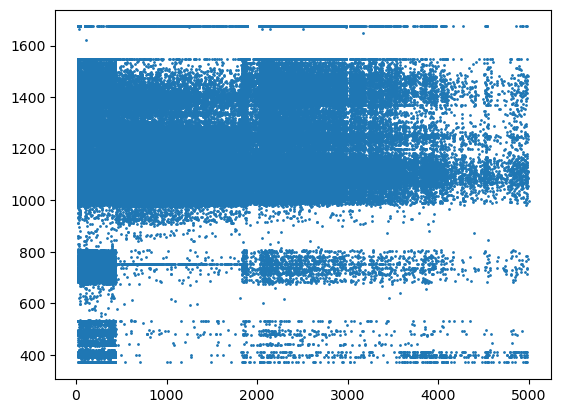

In [94]:
plt.scatter(ytest, best.predict(xtest),s=1)

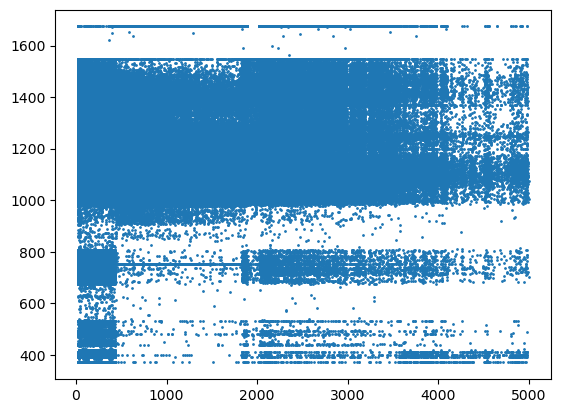

In [95]:
plt.scatter(ytrain, best.predict(xtrain),s=1)

In [103]:
ss = StandardScaler()
pipe = Pipeline([('scaler',StandardScaler()),('model',SVR())])
param_grid = {'model__C':np.logspace(-4,4,9)}
gs = GridSearchCV(pipe, scoring = 'neg_root_mean_squared_log_error',param_grid=param_grid, cv=3,n_jobs=-1)
param_grid

{'model__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
        1.e+04])}

In [104]:
gs.fit(xtrainsub,ytrainsub)
print(gs.best_params_)
print(gs.best_score_)

c:\Users\Alex\anaconda3\envs\Portfolio\lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [-1.12292336 -1.12292282 -1.12291743 -1.12284187 -1.12225195 -1.11989906
 -1.1165044          nan         nan]
  warnings.warn(


{'model__C': 100.0}
-1.1165043959233054


In [ ]:
best = gs.best_estimator_
best.fit(xtrain,ytrain)
print('test score:',root_mean_squared_log_error(ytest, best.predict(xtest)))

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [103]:
pipe = Pipeline([('scaler',StandardScaler()),('model',GaussianNB())])
pipe.fit(xtrainsub,ytrainsub)

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

In [ ]:
pipe.fit(xtrain,ytrain)
print('test score:',root_mean_squared_log_error(ytest, pipe.predict(xtest)))

KeyboardInterrupt: 

In [ ]:
pipe = Pipeline([('scaler',StandardScaler()),('model',AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=50,))])
param_grid = {'model__estimator__min_weight_fraction_leaf':np.logspace(-4,-1,20),
              'model__n_estimators':[100],
              'model__learning_rate':[1,0.1,10],
              'model__estimator__max_depth':[None]}
gs = GridSearchCV(pipe, scoring = 'neg_root_mean_squared_log_error',param_grid=param_grid, cv=3)
param_grid

{'model__estimator__min_weight_fraction_leaf': array([0.0001    , 0.00014384, 0.00020691, 0.00029764, 0.00042813,
        0.00061585, 0.00088587, 0.00127427, 0.00183298, 0.00263665,
        0.00379269, 0.00545559, 0.0078476 , 0.01128838, 0.01623777,
        0.02335721, 0.03359818, 0.0483293 , 0.06951928, 0.1       ]),
 'model__n_estimators': [100],
 'model__learning_rate': [1, 0.1, 10],
 'model__estimator__max_depth': [None]}

In [134]:
gs.fit(xtrainsub,ytrainsub)
print(gs.best_params_)
print(gs.best_score_)

{'model__estimator__max_depth': None, 'model__estimator__min_weight_fraction_leaf': 0.0001, 'model__learning_rate': 0.1, 'model__n_estimators': 100}
-1.1208859013996049


In [135]:
pipe = Pipeline([('scaler',StandardScaler()),('model',AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=50,))])
param_grid = {'model__estimator__min_weight_fraction_leaf':np.logspace(-5,-3,10),
              'model__n_estimators':[100],
              'model__learning_rate':[0.01,0.1,1],
              'model__estimator__max_depth':[None]}
gs = GridSearchCV(pipe, scoring = 'neg_root_mean_squared_log_error',param_grid=param_grid, cv=3)
param_grid

{'model__estimator__min_weight_fraction_leaf': array([1.00000000e-05, 1.66810054e-05, 2.78255940e-05, 4.64158883e-05,
        7.74263683e-05, 1.29154967e-04, 2.15443469e-04, 3.59381366e-04,
        5.99484250e-04, 1.00000000e-03]),
 'model__n_estimators': [100],
 'model__learning_rate': [0.01, 0.1, 1],
 'model__estimator__max_depth': [None]}

In [136]:
gs.fit(xtrainsub,ytrainsub)
print(gs.best_params_)
print(gs.best_score_)

{'model__estimator__max_depth': None, 'model__estimator__min_weight_fraction_leaf': 4.641588833612782e-05, 'model__learning_rate': 0.01, 'model__n_estimators': 100}
-1.1148971385139943


In [137]:
best = gs.best_estimator_
best.fit(xtrain,ytrain)
print('test score:',root_mean_squared_log_error(ytest, best.predict(xtest)))

test score: 1.136210738878389
